In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import re
import string
import nltk
from nltk.corpus import stopwords

# Checking the DataFrames

In [2]:
test_df = pd.read_csv('test.csv')

In [3]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [4]:
test_df.shape

(3263, 4)

In [5]:
train_df = pd.read_csv('train.csv')

In [6]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
train_df.shape

(7613, 5)

In [8]:
test_df.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [9]:
train_df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [10]:
train_df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [11]:
train_df['keyword'].value_counts()

fatalities               45
armageddon               42
deluge                   42
body%20bags              41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [12]:
train_df['location'].value_counts()

USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
Manila City              1
lost in my thoughts      1
Galatians 2:20           1
Windsor,Ontario          1
73101                    1
Name: location, Length: 3341, dtype: int64

In [13]:
train_df = train_df.drop(columns = 'location')
test_df = test_df.drop(columns = 'location')

Location columns were dropped due to large inconsistencies and many missing values.

# Exploring Real and Fake Disaster Tweet Distributions 

In [14]:
sns.set(font_scale=2)
sns.set(rc={'figure.figsize':(10,10)})

C:\Users\malak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


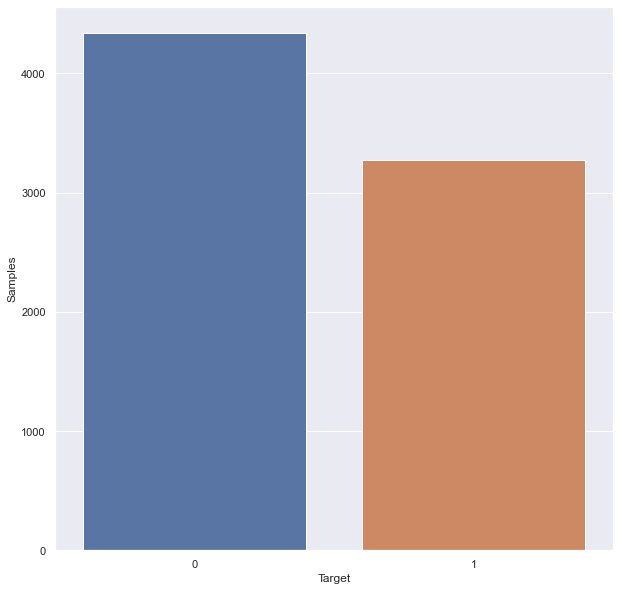

In [15]:
x = train_df['target'].value_counts()
sns.barplot(x.index, x)
plt.xlabel('Target')
plt.ylabel('Samples')
plt.show()

0 means the tweet is a fake disaster tweet; 1 means the tweet is a real disaster tweet.

In [16]:
disaster_tweets = train_df[train_df['target'] ==1]['text']

In [17]:
non_disaster_tweets = train_df[train_df['target'] ==0]['text']

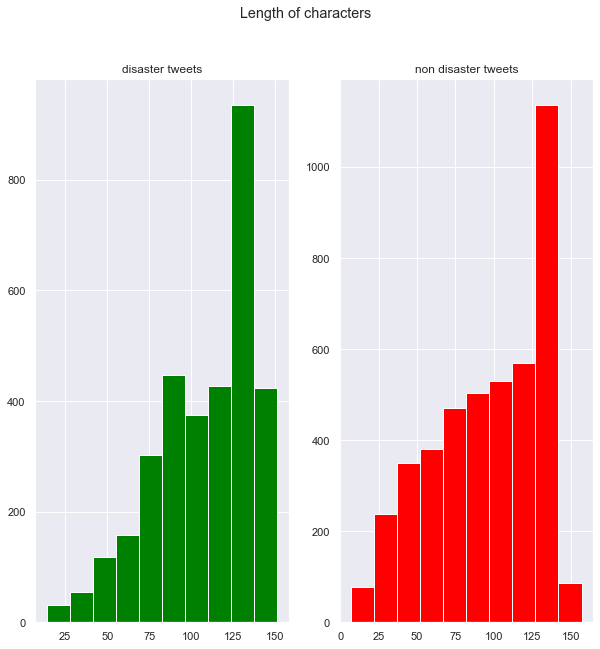

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(disaster_tweets.str.len(), color = 'green')
ax1.set_title('disaster tweets')
ax2.hist(non_disaster_tweets.str.len(), color = 'red')
ax2.set_title('non disaster tweets')
fig.suptitle('Length of characters')
plt.show()

C:\Users\malak\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\malak\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


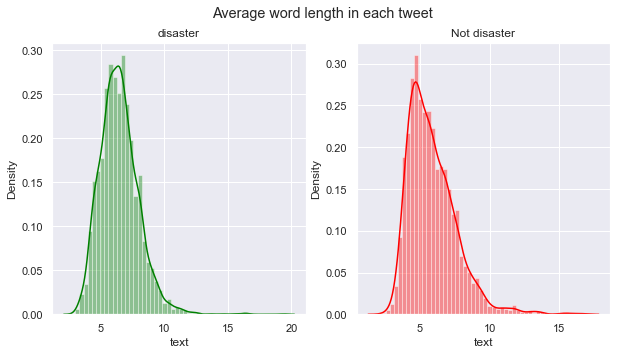

In [19]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word=train_df[train_df['target']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='green')
ax1.set_title('disaster')
word=train_df[train_df['target']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='red')
ax2.set_title('Not disaster')
fig.suptitle('Average word length in each tweet')
plt.show()

<AxesSubplot:xlabel='keyword'>

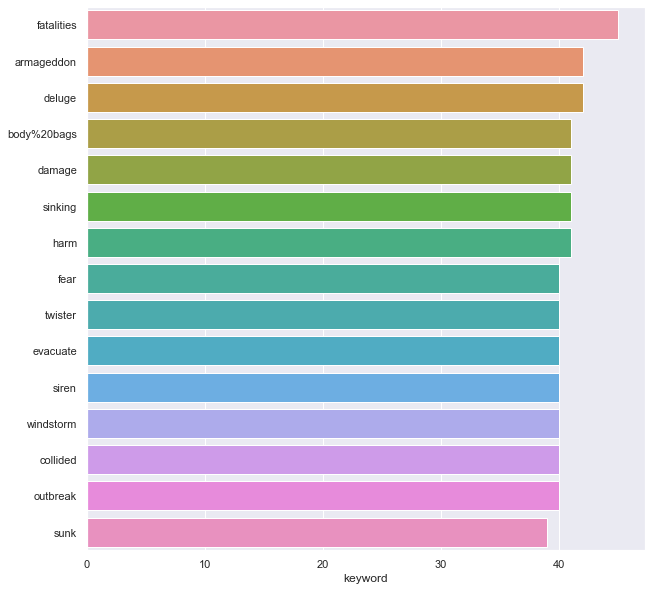

In [20]:
sns.barplot(y = train_df['keyword'].value_counts()[:15].index, x = train_df['keyword'].value_counts()[:15], orient = 'h')

These are the top keywords that appear in the training dataset.

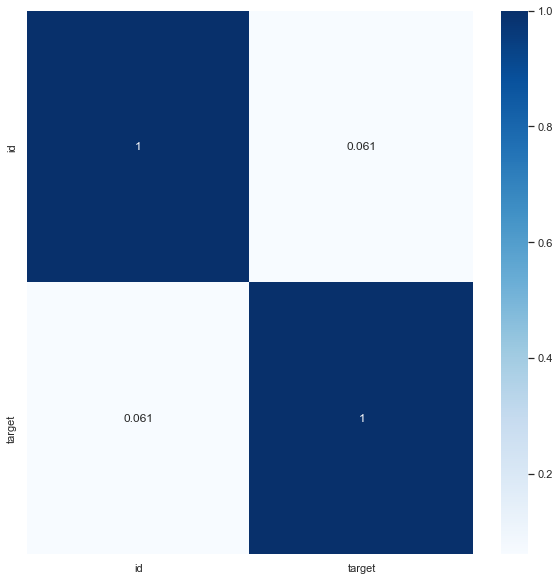

In [21]:
corr = train_df.corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.show()

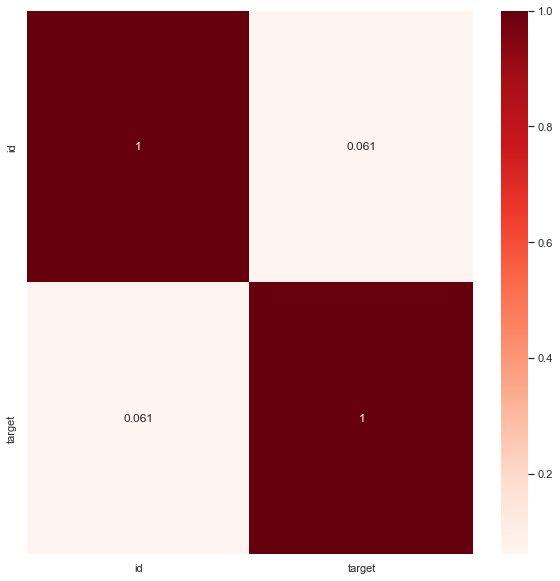

In [22]:
corr2 = test_df.corr()
sns.heatmap(corr, annot=True, cmap='Reds')
plt.show()

In [23]:
train_df['text'][:20]

0     Our Deeds are the Reason of this #earthquake M...
1                Forest fire near La Ronge Sask. Canada
2     All residents asked to 'shelter in place' are ...
3     13,000 people receive #wildfires evacuation or...
4     Just got sent this photo from Ruby #Alaska as ...
5     #RockyFire Update => California Hwy. 20 closed...
6     #flood #disaster Heavy rain causes flash flood...
7     I'm on top of the hill and I can see a fire in...
8     There's an emergency evacuation happening now ...
9     I'm afraid that the tornado is coming to our a...
10          Three people died from the heat wave so far
11    Haha South Tampa is getting flooded hah- WAIT ...
12    #raining #flooding #Florida #TampaBay #Tampa 1...
13              #Flood in Bago Myanmar #We arrived Bago
14    Damage to school bus on 80 in multi car crash ...
15                                       What's up man?
16                                        I love fruits
17                                     Summer is

In [24]:
test_df['text']

0                      Just happened a terrible car crash
1       Heard about #earthquake is different cities, s...
2       there is a forest fire at spot pond, geese are...
3                Apocalypse lighting. #Spokane #wildfires
4           Typhoon Soudelor kills 28 in China and Taiwan
                              ...                        
3258    EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259    Storm in RI worse than last hurricane. My city...
3260    Green Line derailment in Chicago http://t.co/U...
3261    MEG issues Hazardous Weather Outlook (HWO) htt...
3262    #CityofCalgary has activated its Municipal Eme...
Name: text, Length: 3263, dtype: object

# Text cleaning, tokenization, and stop word removal

In [25]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation, remove words containing numbers,
    and remove emoticons.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", '', text)
    return text

train_df['text'] = train_df['text'].apply(lambda x: clean_text(x))
test_df['text'] = test_df['text'].apply(lambda x: clean_text(x))

train_df['text']

0       our deeds are the reason of this earthquake ma...
1                   forest fire near la ronge sask canada
2       all residents asked to shelter in place are be...
3        people receive wildfires evacuation orders in...
4       just got sent this photo from ruby alaska as s...
                              ...                        
7608    two giant cranes holding a bridge collapse int...
7609    ariaahrary thetawniest the out of control wild...
7610                                 s of volcano hawaii 
7611    police investigating after an ebike collided w...
7612    the latest more homes razed by northern califo...
Name: text, Length: 7613, dtype: object

In [26]:
def text_preprocessing(text):
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    
    clean = clean_text(text)
    tokenized_text = tokenizer.tokenize(clean)
    remove_stopwords = [w for w in tokenized_text if w not in stopwords.words('english')]
    combined_text = ' '.join(remove_stopwords)
    return combined_text

train_df.head()

,id,keyword,text,target
0,1,NaN,our deeds are the reason of this earthquake ma...,1
1,4,NaN,forest fire near la ronge sask canada,1
2,5,NaN,all residents asked to shelter in place are be...,1
3,6,NaN,people receive wildfires evacuation orders in...,1
4,7,NaN,just got sent this photo from ruby alaska as s...,1


In [28]:
train_df.to_csv('Training Data.csv')

In [29]:
test_df.to_csv('Testing Data.csv')